<div style="padding:8px; color:#ECEEF1; margin:0.3; font-size:190%; text-align:center; display:fill; border-radius:5px; background-color:#42659A; overflow:hidden; font-weight:250; font-family:helvetica;"> 0261_Project_004 - 04 </div>


<div style="padding:8px; color:#ECEEF1; margin:0.3; font-size:190%; text-align:center; display:fill; border-radius:5px; background-color:#617A9A; overflow:hidden; font-weight:270; font-family:helvetica;"> General Project Steps</div>
<br>
<H3 style="padding:1px; font-family:helvetica; padding-left:20px">Project Description and Information</H3>

<H3 style="padding:1px; font-family:helvetica; padding-left:20px">Web Scraping Financial Information</H3>

<H3 style="padding:1px; font-family:helvetica; padding-left:20px"> Backtesting Strategies</H3>

<H3 style="padding:1px; font-family:helvetica; padding-left:20px"> Index Tracking</H3>

<H3 style="padding:1px; font-family:helvetica; padding-left:20px"> Forward Testing Strategies</H3>


### Note: This is not financial advice and should not be treated as such. This is for educational purposes only.

<div style="padding:8px; color:#ECEEF1; margin:0.3; font-size:190%; text-align:center; display:fill; border-radius:5px; background-color:#42659A; overflow:hidden; font-weight:250; font-family:helvetica;"> General Summary </div>


In [38]:
import numpy as np
import pandas as pd
import unicodedata
import yfinance as yf

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#plt.style.use("seaborn")

In [39]:
def summary_ann(returns):
    summary = returns.agg(["mean", "std"]).T
    summary["Return"] = summary["mean"] * 252
    summary["Risk"] = summary["std"] * np.sqrt(252)
    summary.drop(columns=["mean", "std"], inplace=True)
    return summary


In [40]:
#data = pd.read_csv("/Users/luis/Documents/Proyects_To_Export/0261_DS_Projects/venv_0261_DS_Projects_311/Projects/0261_Project_004/0261_Project_004/0261_Project_004_Data/dji001.csv",
#                   parse_dates=["Date"], index_col="Date")

data = pd.read_csv("/Users/luis/Documents/Proyects_To_Export/0261_DS_Projects/venv_0261_DS_Projects_311/Projects/0261_Project_004/0261_Project_004/0261_Project_004_Data/Previous Data/dji.csv",
parse_dates=["Date"], index_col="Date")

<div style="padding:8px; color:#ECEEF1; margin:0.3; font-size:190%; text-align:center; display:fill; border-radius:5px; background-color:#5274aa; overflow:hidden; font-weight:270; font-family:helvetica;">Backtesting Strategies</div>


In [60]:
### Using previous dji.csv from other notebook
data = pd.read_csv("/Users/luis/Documents/Proyects_To_Export/0261_DS_Projects/venv_0261_DS_Projects_311/Projects/0261_Project_004/0261_Project_004/0261_Project_004_Data/Previous Data/dji.csv",
parse_dates=["Date"], index_col="Date")
#print(len(data))

df01 = data.loc["2010-01-01":"2020-03-31", "Close"].to_frame()
df01["Return"] = df01.pct_change()
df01.dropna(inplace=True)

df01.rename(columns={'Close':"DJI_Close", 'Return':"DJI_Return"}, inplace=True)
df01["Position"] = np.sign(df01["DJI_Return"])
df01["Strategy_Ret"] = df01["Position"].shift(periods = 1, freq = None, axis = 0) * df01["DJI_Return"]
df01["Strategy"] = df01["Strategy_Ret"].add(other=1, axis=0, level=None, fill_value=0).cumprod() * df01.iloc[0,0]


In [61]:
### Using previous dji.csv from other notebook
data = pd.read_csv("/Users/luis/Documents/Proyects_To_Export/0261_DS_Projects/venv_0261_DS_Projects_311/Projects/0261_Project_004/0261_Project_004/0261_Project_004_Data/Previous Data/dji.csv",
parse_dates=["Date"], index_col="Date")
#print(len(data))

#df02 = data.loc["2010-01-01":"2020-03-31", "Close"].to_frame()
df02 = data.loc["2010":,"Close"].to_frame()
df02["Return"] = df02.pct_change()
#df02["DJI_Return"] = df02.Close.pct_change()

df02.dropna(inplace=True)

df02.rename(columns={'Close':"DJI_Close", 'Return':"DJI_Return"}, inplace=True)
#df02.columns = ["DJI_Close","DJI_Return"]

df02["Position"] = -np.sign(df02["DJI_Return"])
df02["Strategy_Ret"] = df02["Position"].shift() * df02["DJI_Return"]
df02["Strategy"] = df02["Strategy_Ret"].add(1, axis=0, fill_value=0).cumprod() * df02.iloc[0,0]



In [62]:
### Using previous dji.csv from other notebook
data = pd.read_csv("/Users/luis/Documents/Proyects_To_Export/0261_DS_Projects/venv_0261_DS_Projects_311/Projects/0261_Project_004/0261_Project_004/0261_Project_004_Data/Previous Data/dji.csv",
parse_dates=["Date"], index_col="Date")
#print(len(data))

#df02 = data.loc["2010-01-01":"2020-03-31", "Close"].to_frame()
df03 = data.loc["2010":,"Close"].to_frame()
df03["DJI_Return"] = df03["Close"].pct_change()
#df03["DJI_Return"] = df03.Close.pct_change()

df03.dropna(inplace=True)

df03.rename(columns={'Close':"DJI_Close", 'Return':"DJI_Return"}, inplace=True)
#df03.columns = ["DJI_Close","DJI_Return"]

### Simple Contrarian Strategy
## If return is positive will short the next day
## If return + next day will be -1

### If DJI_Return is + will short the next day
### If DJI_Return is - will buy the next day
df03["Position"] = np.where(df03["DJI_Return"] > 0.0, -1, 1)
df03["Strategy_Ret"] = df03["Position"].shift() * df03["DJI_Return"]
df03["Strategy"] = df03["Strategy_Ret"].add(1, fill_value=0).cumprod() * df03.iloc[0,0]



In [63]:
### Using previous dji.csv from other notebook
data = pd.read_csv("/Users/luis/Documents/Proyects_To_Export/0261_DS_Projects/venv_0261_DS_Projects_311/Projects/0261_Project_004/0261_Project_004/0261_Project_004_Data/Previous Data/dji.csv",
parse_dates=["Date"], index_col="Date")
#print(len(data))

df04 = data.loc["2010":, "Close"].to_frame()
df04["DJI_Return"] = df04["Close"].pct_change()
df04.columns = ["DJI_Close","DJI_Return"]
df04.dropna(inplace=True)
### Short Selling being Neutral -> Short selling is not allowed

### If DJI_Return is + will short the next day
### If DJI_Return is - will buy the next day
df04["Position"] = np.where(df04["DJI_Return"] > 0.0, 0, 1)
df04["Strategy_Ret"] = df04["Position"].shift() * df04["DJI_Return"]
df04["Strategy"] = df04["Strategy_Ret"].add(1, fill_value=0).cumprod() * df04.iloc[0,0]



In [64]:
### Using previous dji.csv from other notebook
data = pd.read_csv("/Users/luis/Documents/Proyects_To_Export/0261_DS_Projects/venv_0261_DS_Projects_311/Projects/0261_Project_004/0261_Project_004/0261_Project_004_Data/Previous Data/dji.csv",
parse_dates=["Date"], index_col="Date")
#print(len(data))

df05 = data.loc["2010":, "Close"].to_frame()

df05["DJI_Return"] = df05["Close"].pct_change()
df05.columns= ["DJI_Close","DJI_Return"]
df05.dropna(inplace=True)

### For short selling
##df05["Position"] = np.where(df05["DJI_Return"] > 0.0, -1, 1)
### For short selling being neutral when short selling is not allowed
##df05["Position"] = np.where(df05["DJI_Return"] > 0.0, 0, 1)

df05["Position"] = np.where(df05["DJI_Return"] > 0.01, -1, 1)

df05["Strategy_Ret"] = df05["Position"].shift() * df05["DJI_Return"]
df05["Strategy"] = df05["Strategy_Ret"].add(1, fill_value=0).cumprod() * df05.iloc[0,0]



In [65]:
### Using previous dji.csv from other notebook
data = pd.read_csv("/Users/luis/Documents/Proyects_To_Export/0261_DS_Projects/venv_0261_DS_Projects_311/Projects/0261_Project_004/0261_Project_004/0261_Project_004_Data/Previous Data/dji.csv",
parse_dates=["Date"], index_col="Date")
#print(len(data))

df06 = data.loc["2010":, "Close"].to_frame()
df06["DJI_Return"] = df06["Close"].pct_change()
df06.columns= ["DJI_Close","DJI_Return"]
df06.dropna(inplace=True)

df06["SMA50"] = df06["DJI_Close"].rolling(window=50,
                                          min_periods= None,
                                          center= False,
                                          win_type= None,
                                          on= None,
                                          axis= 0,
                                          closed= None,
                                          step= None,
                                          method= 'single').mean()



df06["SMA200"] = df06["DJI_Close"].rolling(window=200,
                                          min_periods= None,
                                          center= False,
                                          win_type= None,
                                          on= None,
                                          axis= 0,
                                          closed= None,
                                          step= None,
                                          method= 'single').mean()


In [66]:
### Using previous dji.csv from other notebook
data = pd.read_csv("/Users/luis/Documents/Proyects_To_Export/0261_DS_Projects/venv_0261_DS_Projects_311/Projects/0261_Project_004/0261_Project_004/0261_Project_004_Data/Previous Data/dji.csv",
parse_dates=["Date"], index_col="Date")
#print(len(data))

df07 = data.loc["2010":, "Close"].to_frame()
df07["DJI_Return"] = df07["Close"].pct_change()
df07.columns= ["DJI_Close","DJI_Return"]
df07.dropna(inplace=True)

df07["SMA50"] = df07["DJI_Close"].rolling(window=50).mean()
df07["SMA200"] = df07["DJI_Close"].rolling(window=200).mean()




In [67]:
### Using previous dji.csv from other notebook
data = pd.read_csv("/Users/luis/Documents/Proyects_To_Export/0261_DS_Projects/venv_0261_DS_Projects_311/Projects/0261_Project_004/0261_Project_004/0261_Project_004_Data/Previous Data/dji.csv",
parse_dates=["Date"], index_col="Date")
#print(len(data))
df08 = data.loc["2010":, "Close"].to_frame()
df08["DJI_Return"] = df08["Close"].pct_change()
df08.columns= ["DJI_Close","DJI_Return"]
df08.dropna(inplace=True)

### Creating SMA50 and SMA200
df08["SMA50"] = df08["DJI_Close"].rolling(window=50).mean()
df08["SMA200"] = df08["DJI_Close"].rolling(window=200).mean()

df08["Position"] = np.sign(df08["SMA50"].sub(df08["SMA200"]))

df08["Strategy_Ret"] = df08["Position"].shift() * df08["DJI_Return"]

df08["Strategy"] = df08["Strategy_Ret"].add(1, fill_value=0).cumprod() * df08.iloc[0,0]



In [68]:
### Using previous dji.csv from other notebook
data = pd.read_csv("/Users/luis/Documents/Proyects_To_Export/0261_DS_Projects/venv_0261_DS_Projects_311/Projects/0261_Project_004/0261_Project_004/0261_Project_004_Data/Previous Data/dji.csv",
parse_dates=["Date"], index_col="Date")
#print(len(data))
df09 = data.loc["2010":, "Close"].to_frame()
df09["DJI_Return"] = df09["Close"].pct_change()
df09.columns = ["DJI_Close", "DJI_Return"]
df09.dropna(inplace=True)

df09["SMA50"] = df09["DJI_Close"].rolling(window=50).mean()
df09["SMA200"] = df09["DJI_Close"].rolling(window=200).mean()
df09.dropna(inplace=True)

df09["Position"] = -np.sign(df09["SMA50"].sub(df09["SMA200"]))

df09["Strategy_Ret"] = df09["Position"].shift() * df09["DJI_Return"]

df09["Strategy"] = df09["Strategy_Ret"].add(1, fill_value=0).cumprod() * df09.iloc[0,0]



In [69]:
#summary_strategy_01_02 = summary_ann(df01[["DJI_Return","Strategy_Ret"]])
#summary_strategy_01_02.rename({"DJI_Return":"Buy_and_Hold_df01", "Strategy_Ret":"Simple_Momentum_df01"}, inplace=True)
#summary_strategy_01_02

#summary_strategy_02_02 = summary_ann(df02[["DJI_Return","Strategy_Ret"]])
#summary_strategy_02_02.rename({"DJI_Return":"Buy_and_Hold_df02", "Strategy_Ret":"Simple_Contrarian_df02"}, inplace=True)
#summary_strategy_02_02

summary_strategy_03_02 = summary_ann(df02[["DJI_Return","Strategy_Ret"]])
summary_strategy_03_02.rename({"DJI_Return":"Buy_and_Hold_df03", "Strategy_Ret":"Simple_Contrarian_df03"}, inplace=True)
summary_strategy_03_02

summary_strategy_04_02 = summary_ann(df04[["DJI_Return","Strategy_Ret"]])
summary_strategy_04_02.rename({"DJI_Return":"Buy_and_Hold_df04", "Strategy_Ret":"Neutral_Short_Selling_df04"}, inplace=True)
summary_strategy_04_02

summary_strategy_05_02 = summary_ann(df05[["DJI_Return","Strategy_Ret"]])
summary_strategy_05_02.rename({"DJI_Return":"Buy_and_Hold_df05", "Strategy_Ret":"Buy_or_Short_1Percent_df05"}, inplace=True)
summary_strategy_05_02

#df06, df07, SMA50 comparing to SMA200

summary_strategy_08_02 = summary_ann(df08[["DJI_Return","Strategy_Ret"]])
summary_strategy_08_02.rename({"DJI_Return":"Buy_and_Hold_df08", "Strategy_Ret":"SMA50_sub_SMA200_df08"}, inplace=True)
summary_strategy_08_02

summary_strategy_09_02 = summary_ann(df09[["DJI_Return","Strategy_Ret"]])
summary_strategy_09_02.rename({"DJI_Return":"Buy_and_Hold_df09", "Strategy_Ret":"SMA50_sub_SMA200_contr_df09"}, inplace=True)
summary_strategy_09_02

all_strategies_df = pd.concat([summary_strategy_03_02,
           summary_strategy_04_02,
           summary_strategy_05_02,
           summary_strategy_08_02,
           summary_strategy_09_02])

#all_strategies_df
all_strategies_df = all_strategies_df.drop(labels=['Buy_and_Hold_df04', 'Buy_and_Hold_df05', 'Buy_and_Hold_df08', 'Buy_and_Hold_df09'],
                       axis=0)
#all_strategies_df
all_strategies_df = all_strategies_df.rename({"Buy_and_Hold_df03":"Buy_and_Hold_df"})
all_strategies_df
          


,Return,Risk
Buy_and_Hold_df,0.087212,0.167896
Simple_Contrarian_df03,0.057966,0.167946
Neutral_Short_Selling_df04,0.072152,0.125301
Buy_or_Short_1Percent_df05,0.174262,0.167659
SMA50_sub_SMA200_df08,-0.022887,0.167655
SMA50_sub_SMA200_contr_df09,0.022887,0.167655


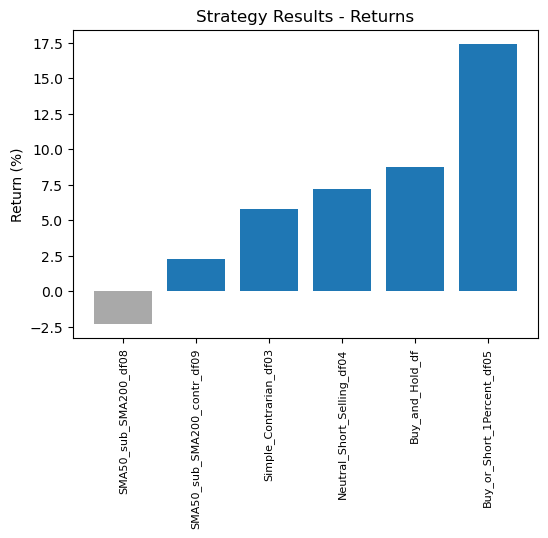

In [70]:
## Source
## https://stackoverflow.com/questions/22311139/bar-chart-how-to-choose-color-if-value-is-positive-vs-value-is-negative
#data['values'].plot(kind='barh',
#                    color=(data['values'] > 0).map({True: 'g',
#                                                    False: 'r'}))

all_strategies_df_sorted = all_strategies_df.sort_values(by="Return")
all_strategies_df_sorted

plt.figure(figsize=(6,4))
#plt.bar(x=all_strategies_df_sorted["Return"].index, height=all_strategies_df_sorted["Return"].values)
plt.bar(x=all_strategies_df_sorted["Return"].index, height=(all_strategies_df_sorted["Return"].values*100),
        #color = "tab:blue")
       color=(all_strategies_df_sorted["Return"] > 0).map({True:'tab:blue', False:'darkgrey'}))

plt.xticks(np.arange(0, len(all_strategies_df_sorted.index)),all_strategies_df_sorted.index, rotation=90, fontsize=8)
plt.xlabel("")
plt.ylabel("Return (%)")

plt.title("Strategy Results - Returns", fontsize=12)

plt.savefig("/Users/luis/Documents/Proyects_To_Export/0261_DS_Projects/venv_0261_DS_Projects_311/Projects/0261_Project_004/0261_Project_004/0261_Project_004_Notebooks/Images/Saved_Images/02/0013_002.png", 
            bbox_inches='tight', dpi=90)
plt.show()


